# How to use visualization libraries in Python

* If graph is standard and simple, for dataset visualization you can use plotting methods from `pandas`
* If graph is non standard it's reasonable to use `matplotlib`
* If graph very diffcult and non standard it's reasonable to divide it into several standard graphs and use `matplotlib`
* If you need beautiful professional graphs, histograms with distributions, japaneese candles, pairplot, heatmap, etc., it's reasonable to use `seaborn`. Using of `matplotlib` is also possible this way, but it takes much more time.
* You should use `plotly` if you have 2 hours for making of graph of good quality.
* If you want to make only one very beautiful graph you will have been paid very well for, use `plotly` 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's use the Titanic dataset for our purposes.

In [2]:
df = pd.read_csv("titanic.csv")

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


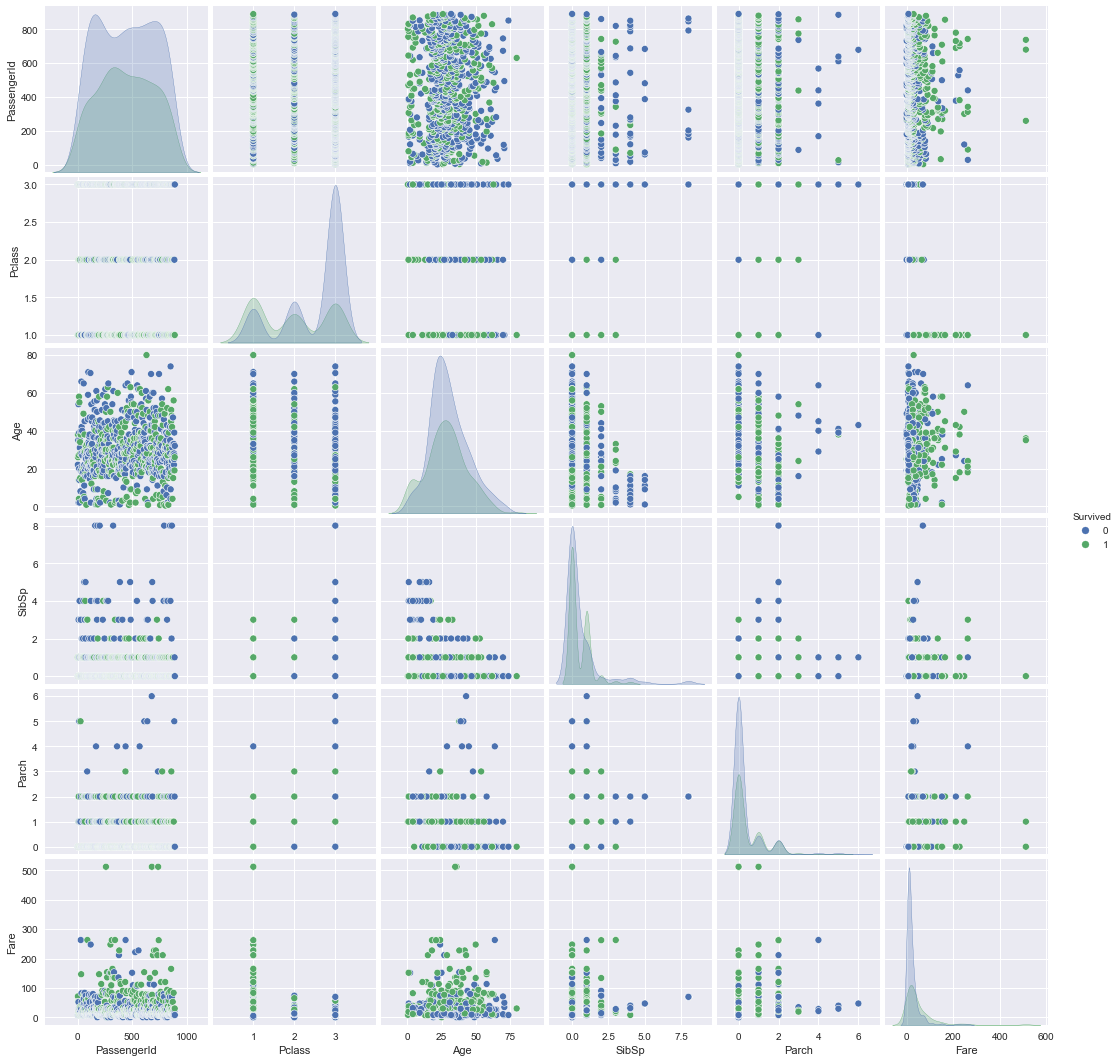

In [11]:
sns.pairplot(df, hue="Survived")

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# data gaps
df.isnull().mean()

# We can see that we have few information about Cabin, 
# and a little information about Age and Embarked of passengers

# Note: if field not zero then there are gaps for sure. If field zero, 
# gaps may be presented and may be not presented,
# additional data analysis is needed

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

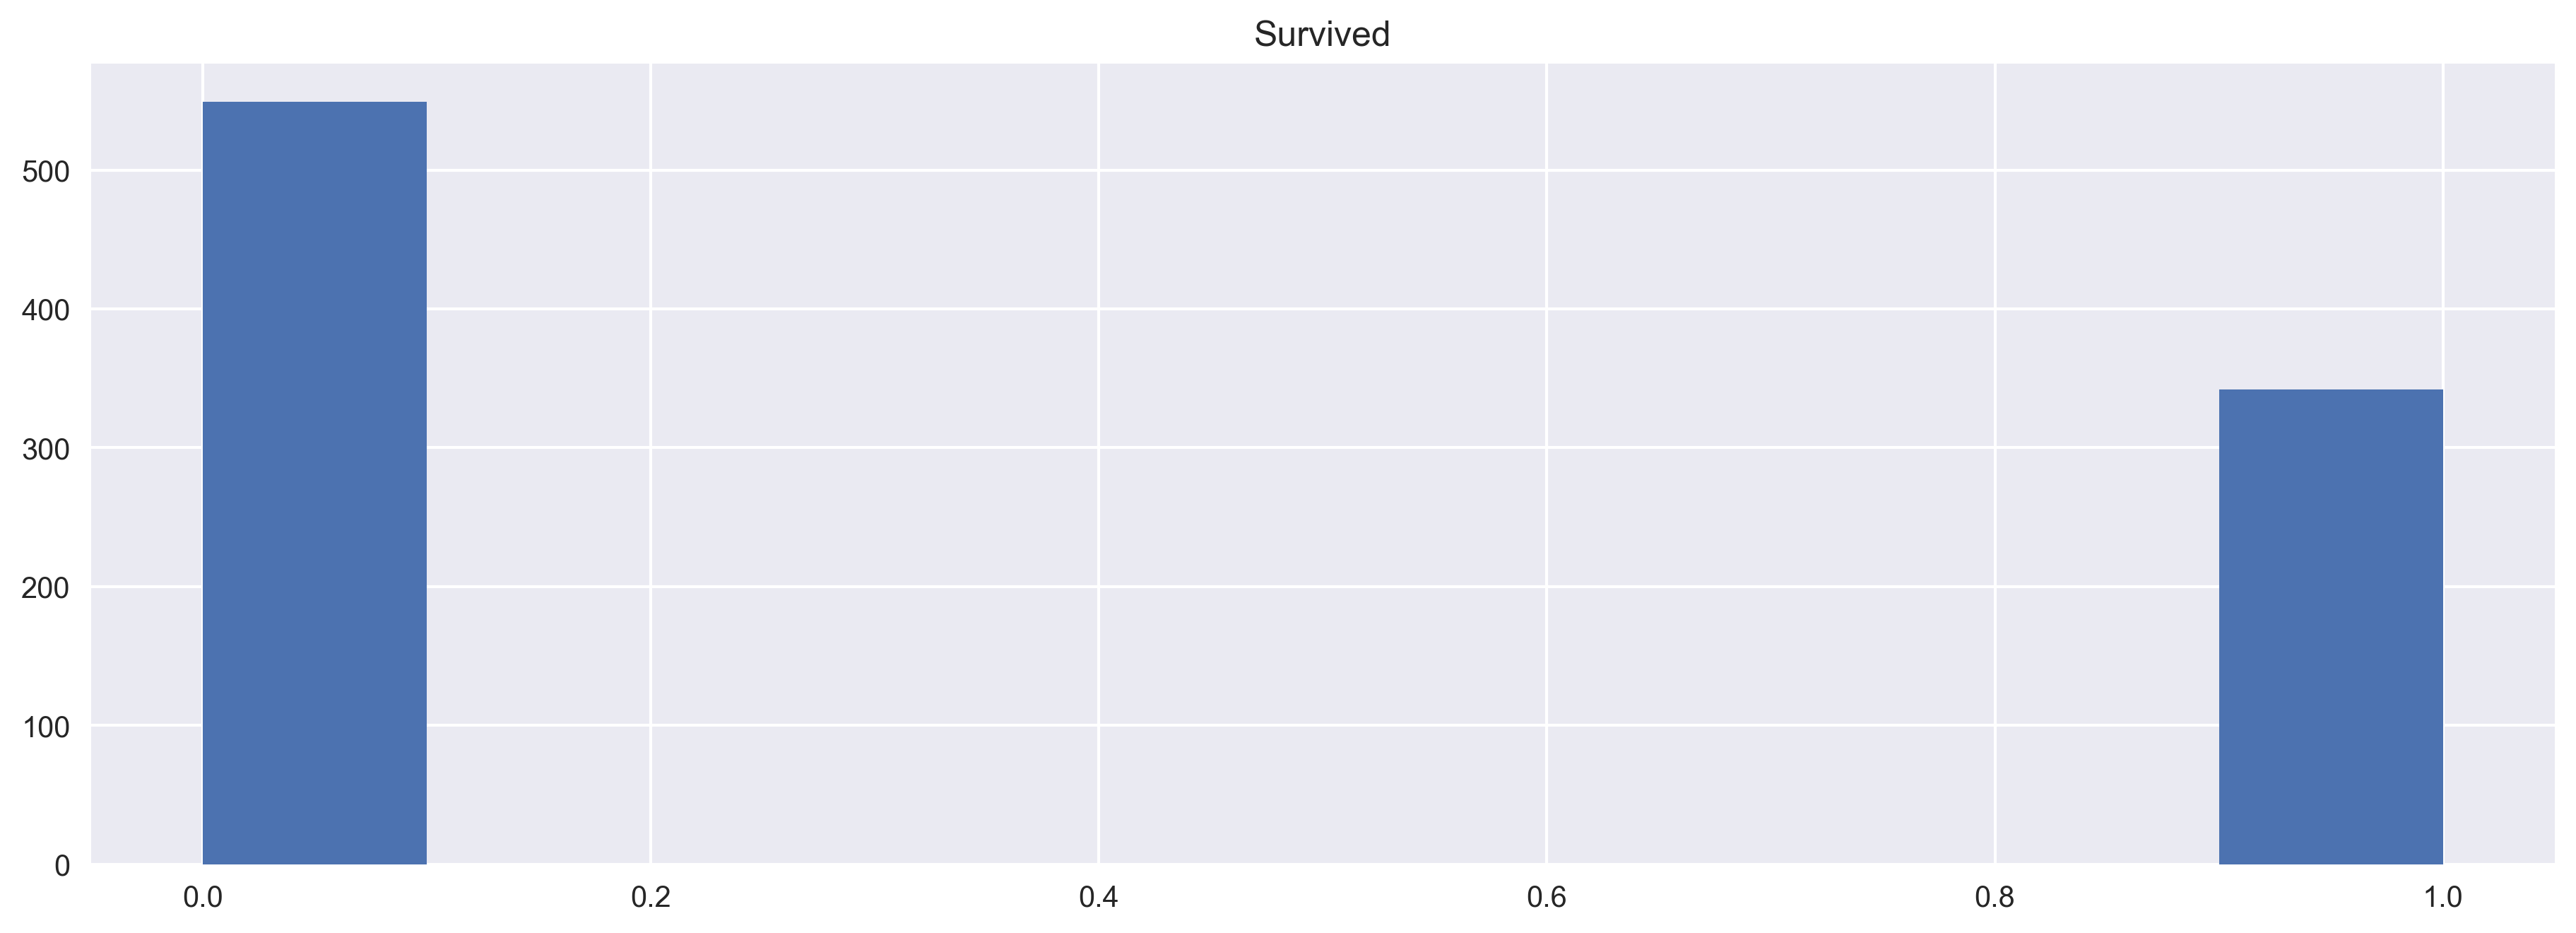

In [16]:
plt.figure(figsize=(15, 5), dpi=300)
plt.title("Survived")
df['Survived'].hist();

# Not so many information

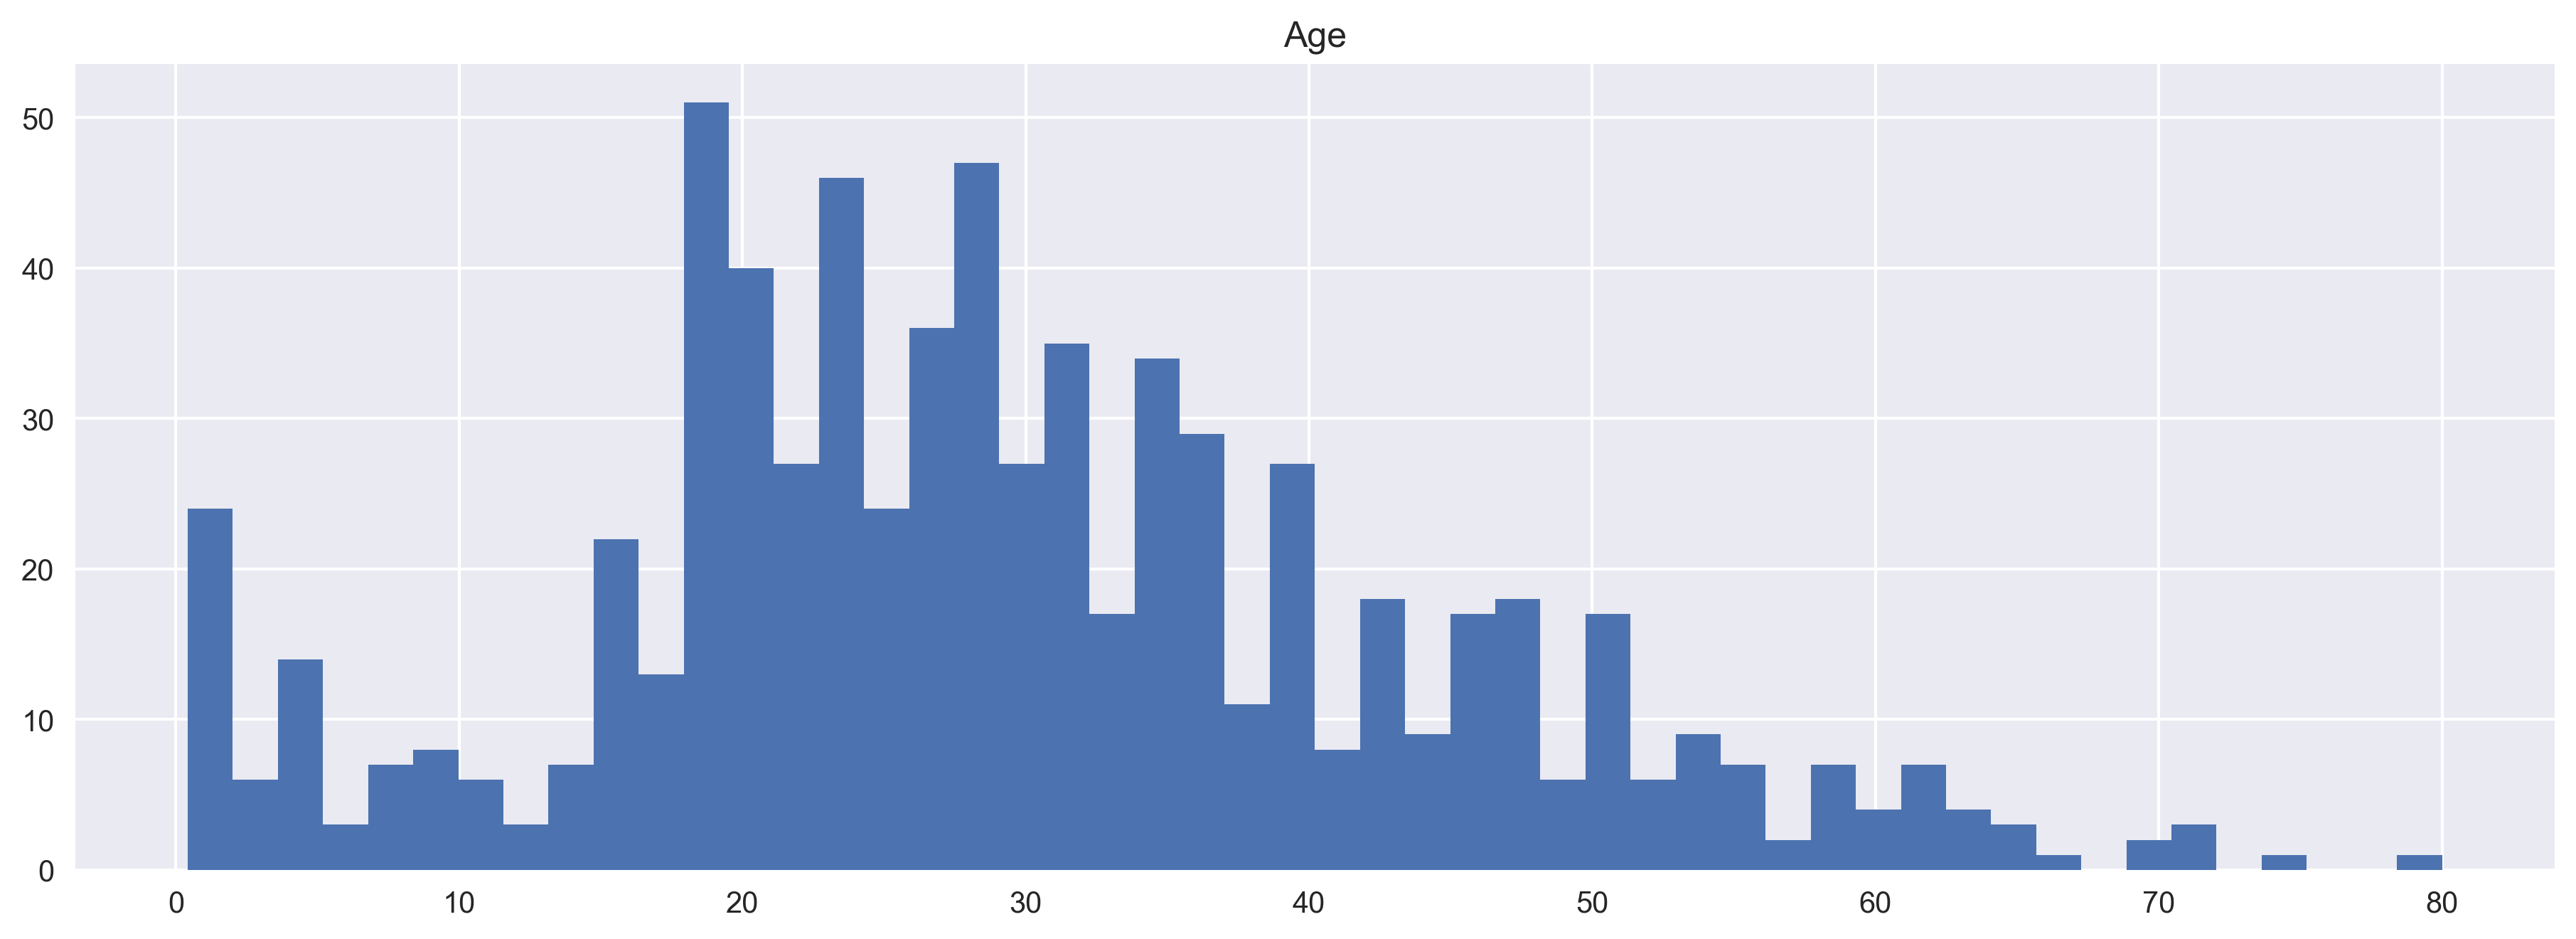

In [21]:
# Distribytion by age

plt.figure(figsize=(15, 5), dpi=300)
plt.title("Age")
df['Age'].hist(bins=50);

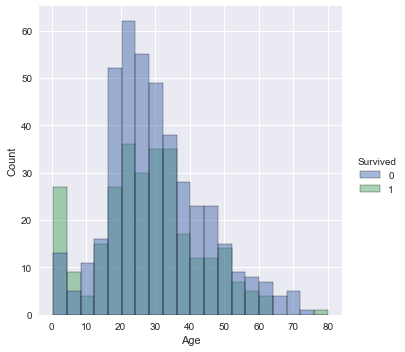

In [22]:
# Division by groups of survived and not survived - in seaborn

sns.displot(df, x="Age", hue="Survived")

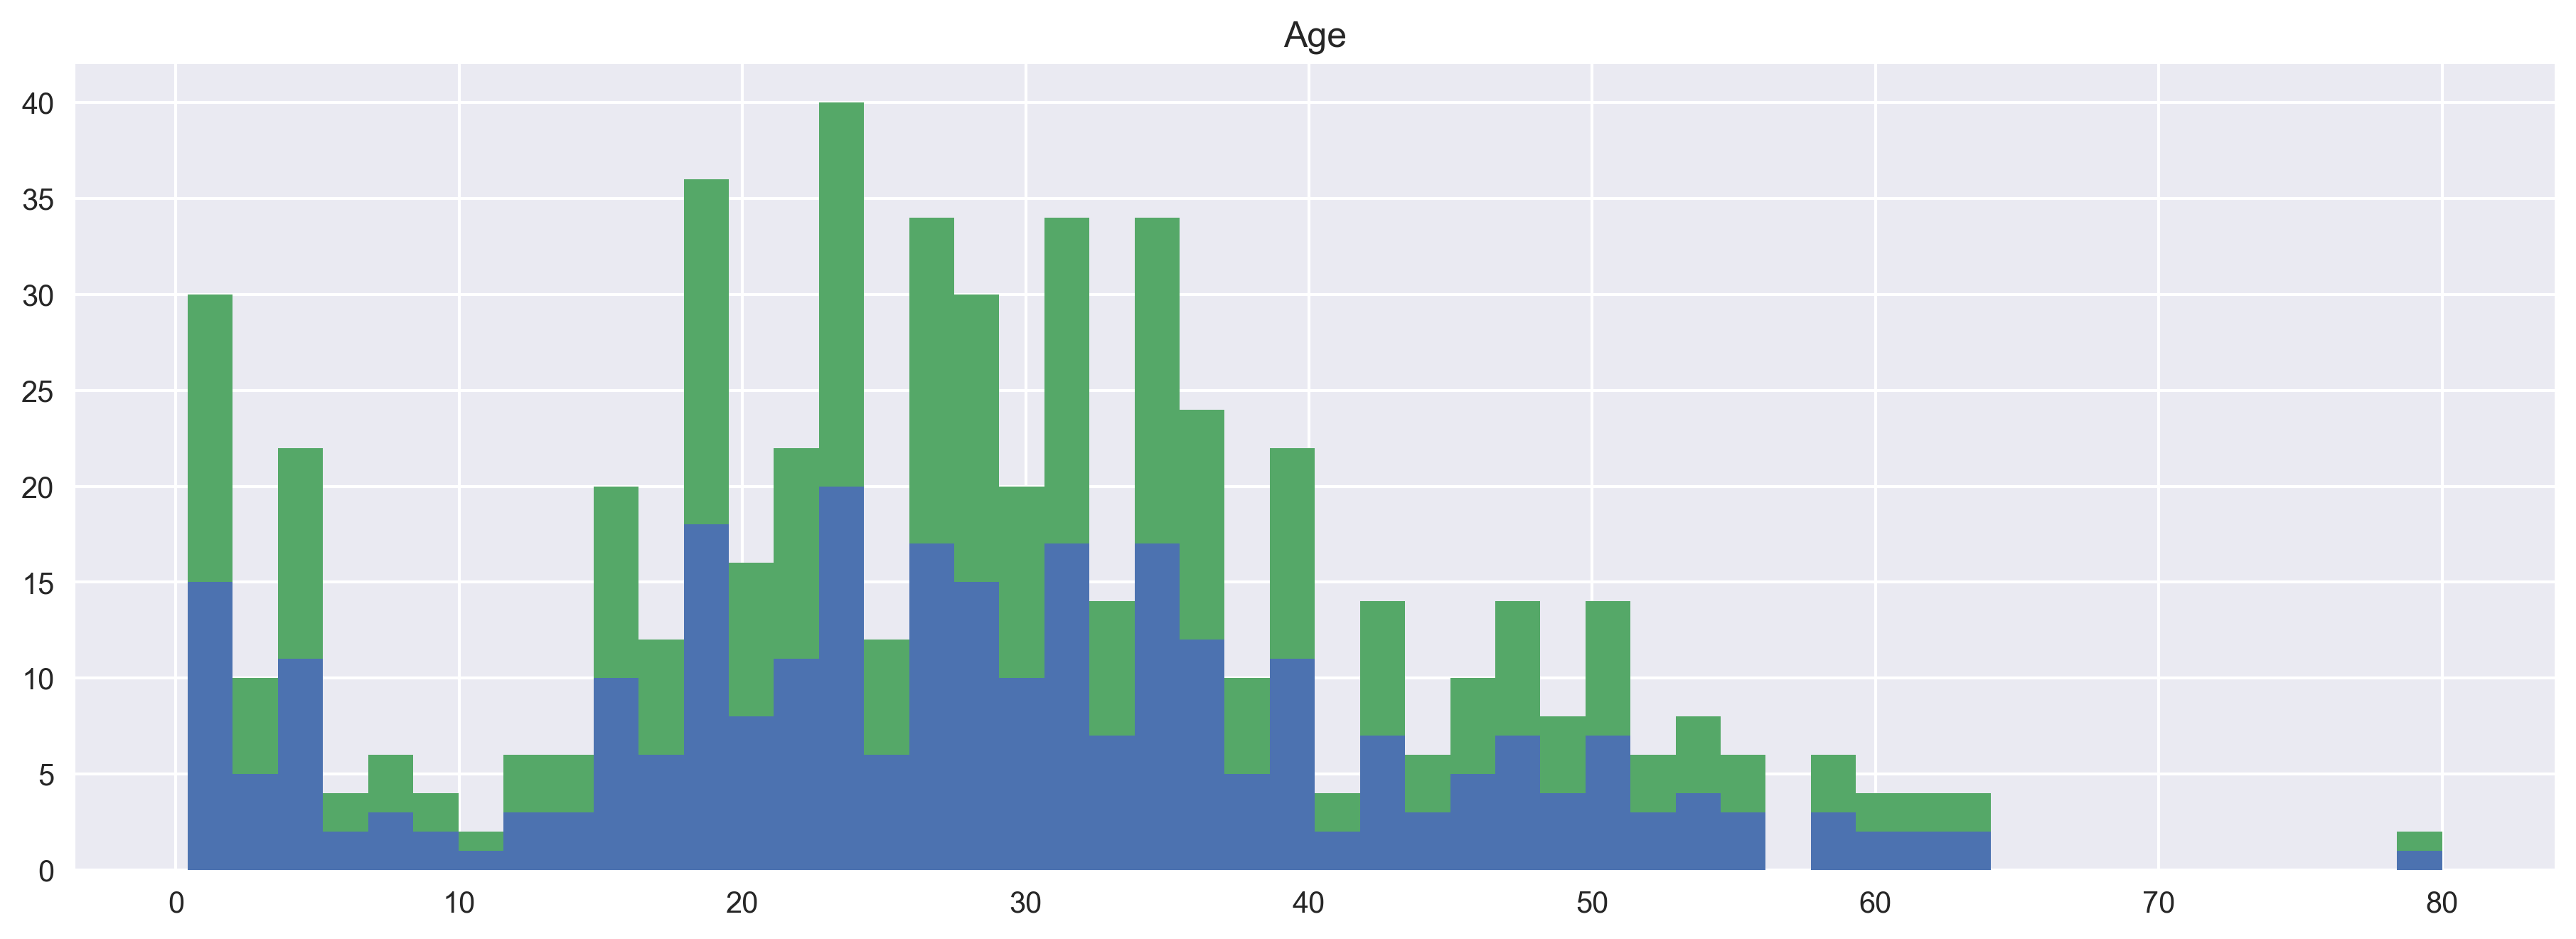

In [26]:
# And now plot the same graph in matplotlib

plt.figure(figsize=(15, 5), dpi=300)
plt.title("Age")
plt.hist([df["Age"][df['Survived'] == 1], df['Age'][df['Survived'] == 1]], stacked=True, bins=50);

In [27]:
# Counting of correlation between numerical signs:

df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

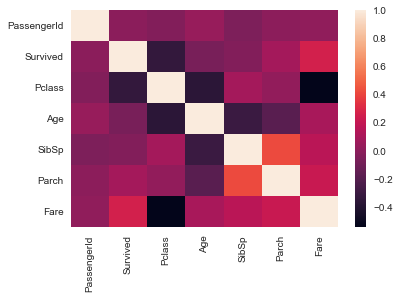

In [28]:
# Correlations graph

sns.heatmap(df.corr())

<AxesSubplot:>

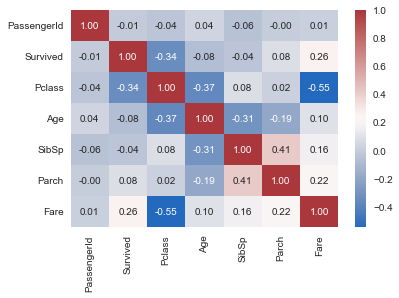

In [30]:
# The same graph but with numbers

sns.heatmap(df.corr(), cmap='vlag', annot=True, fmt="0.2f")

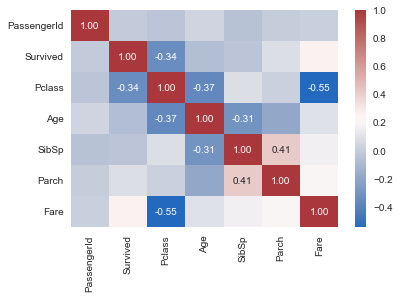

In [32]:
# But the best option is visualization of only valuable correlations

ax = sns.heatmap(df.corr(), cmap='vlag', annot=True, fmt="0.2f")

for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

<AxesSubplot:ylabel='Pclass'>

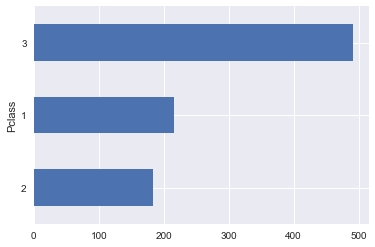

In [35]:
# Bar plot, number of passengers according to Passenger class

df.groupby("Pclass")["Name"].nunique().sort_values().plot(kind='barh')

# Visualization of sorted number of unique names in each passengers classes

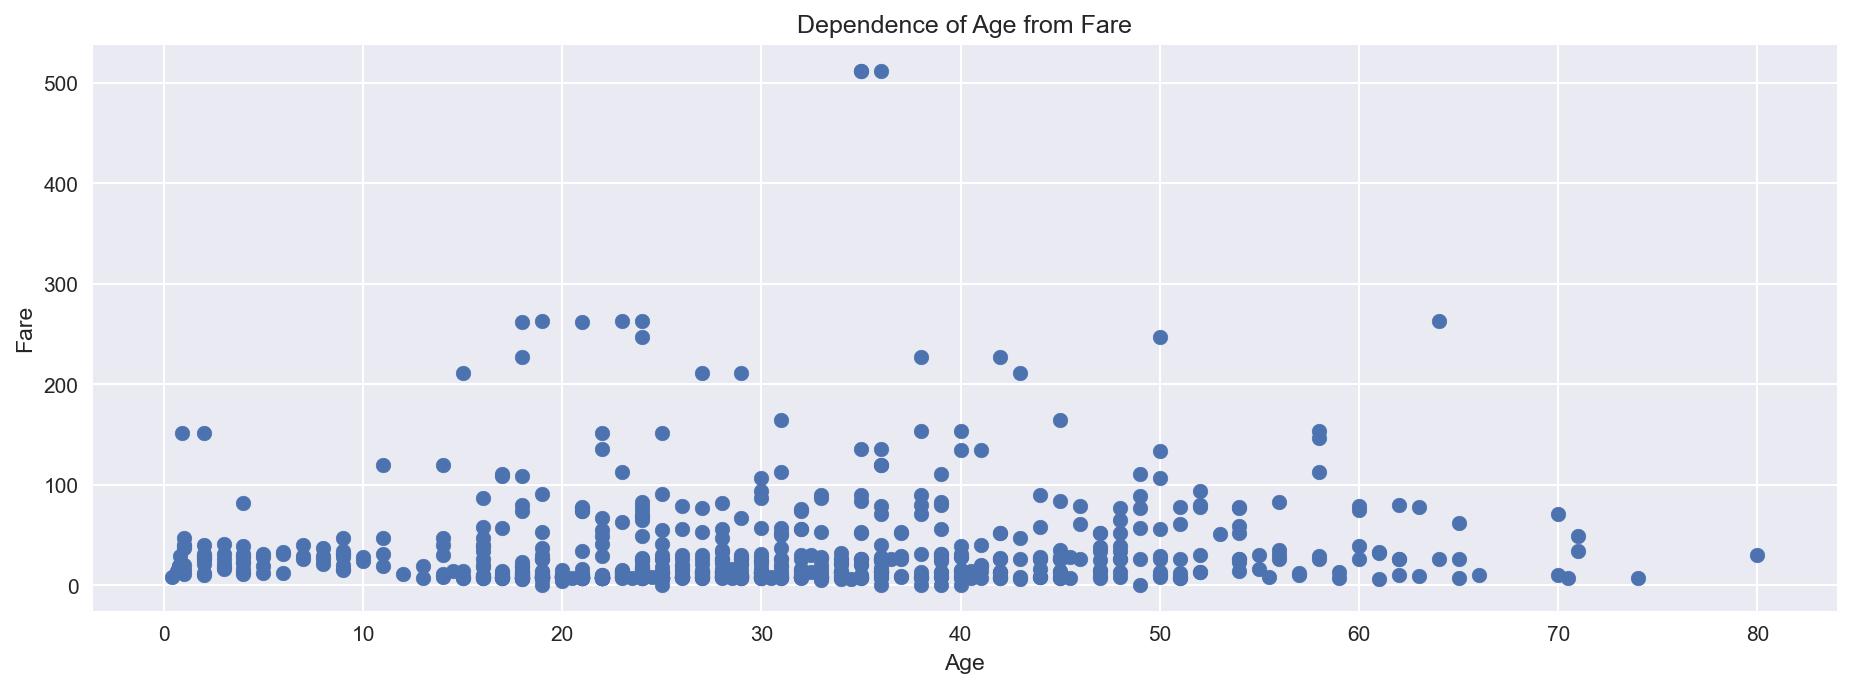

In [40]:
# Scatter plot (point cloud)

plt.figure(figsize=(15, 5), dpi=150)
plt.title("Dependence of Age from Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(df["Age"], df["Fare"])

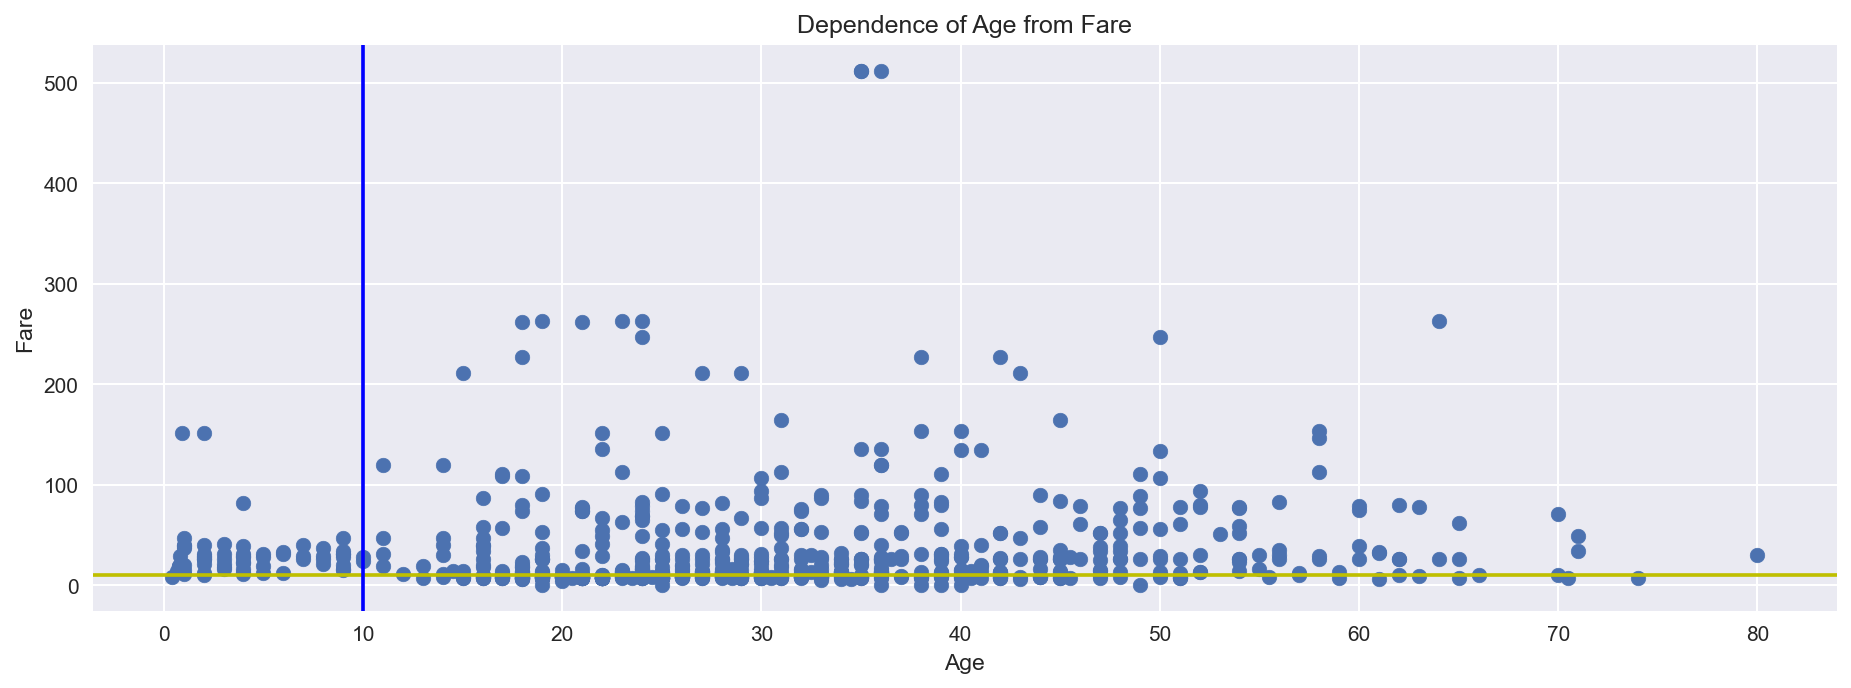

In [41]:
# We can plot vertical and horizontal lines on scatter plot

plt.figure(figsize=(15, 5), dpi=150)
plt.title("Dependence of Age from Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.axhline(10, c='y')
plt.axvline(10, c='b')
plt.scatter(df["Age"], df["Fare"])

# It would be useful for representation, for instance, median, mean value
# or something like that

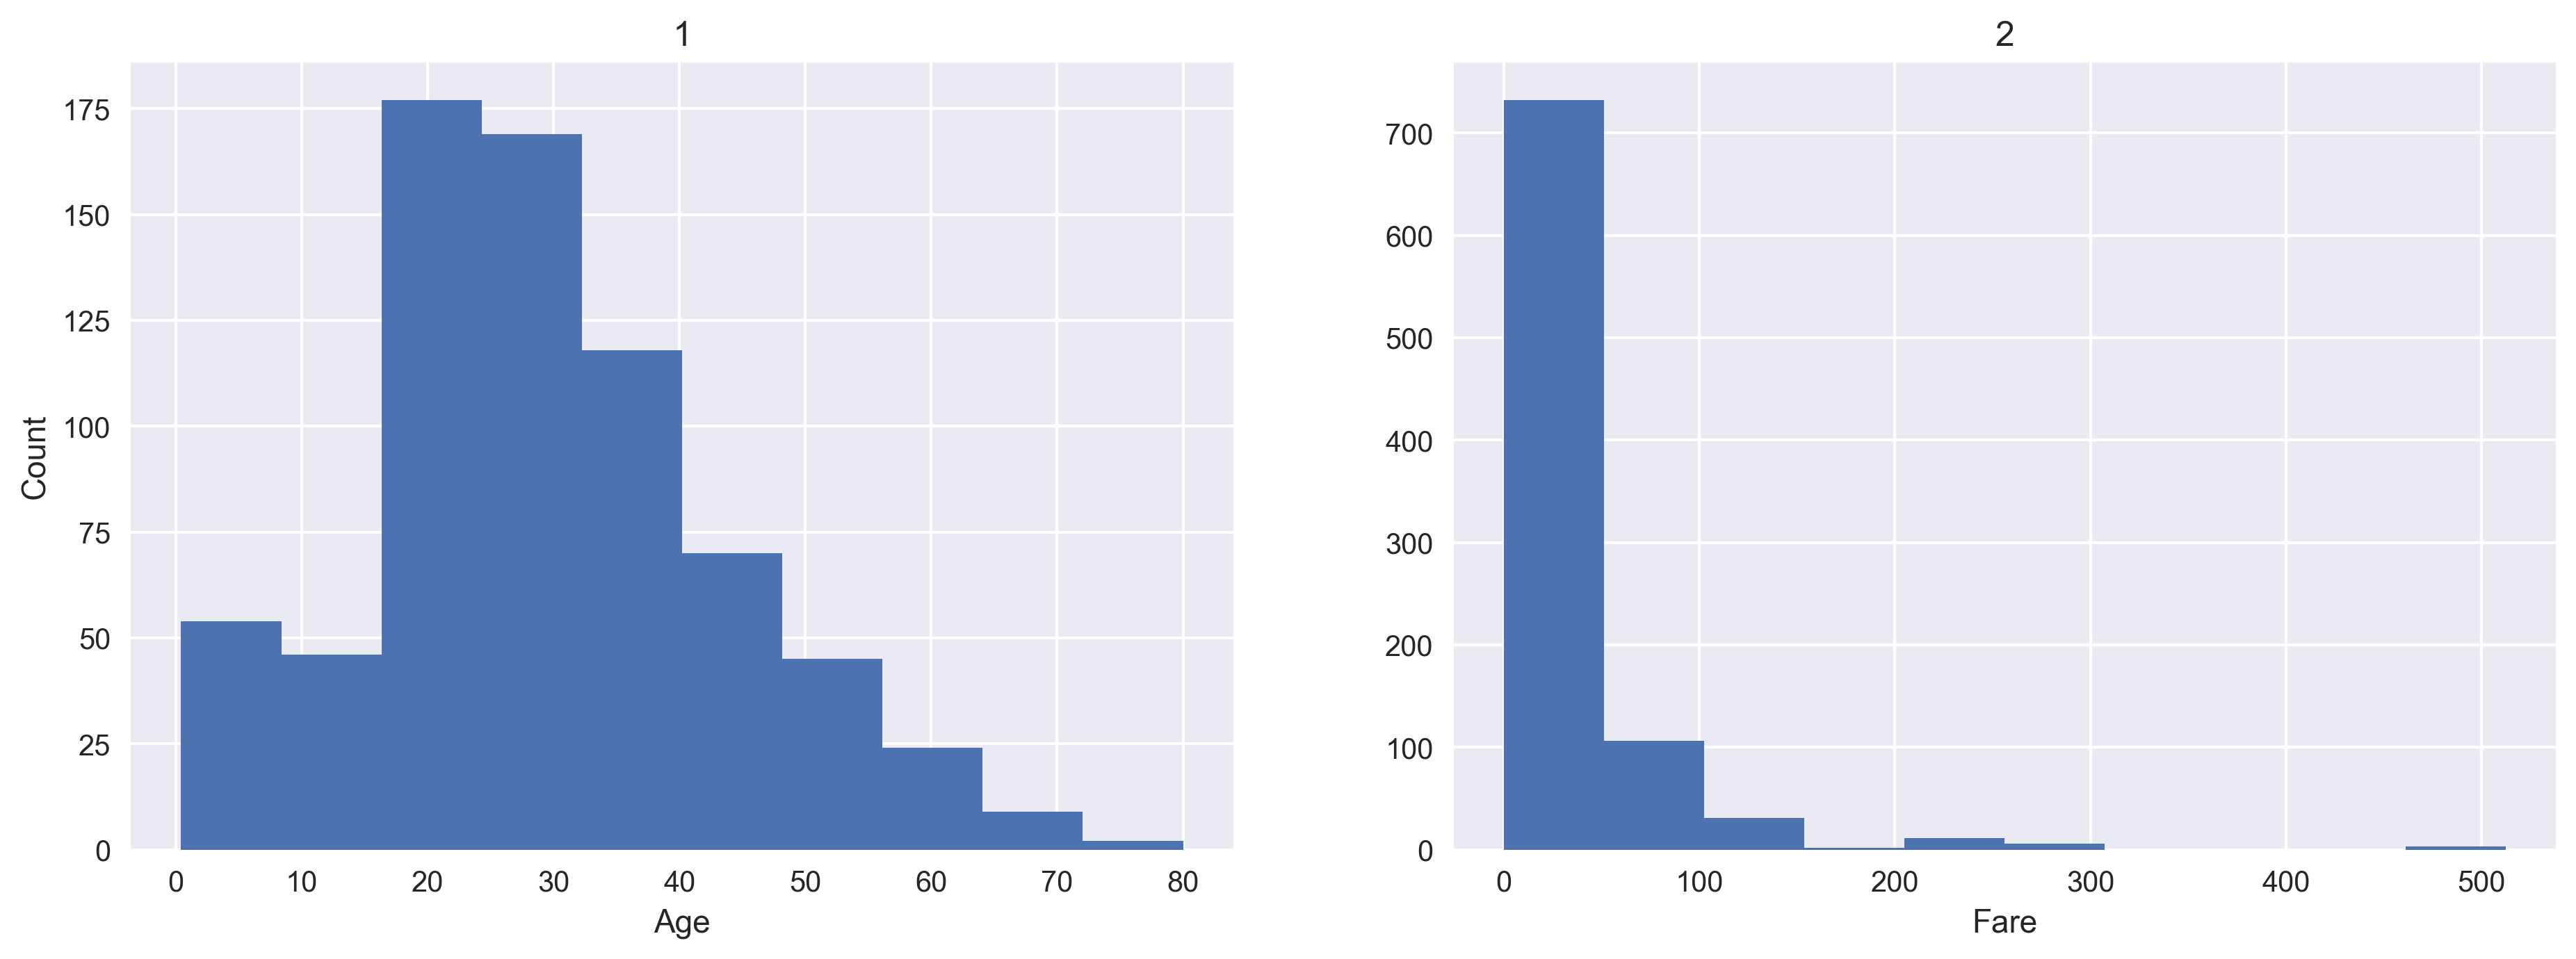

In [43]:
# We also can make subplots (graphs with one property 
# on x(y) axis and different properties on y(x) axes)

plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(1, 2, 1)
plt.title ("1")
plt.hist(df["Age"])
plt.ylabel("Count")
plt.xlabel("Age")
plt.subplot(1, 2, 2)
plt.title ("2")
plt.hist(df["Fare"])
plt.xlabel("Fare")
plt.show()

# Feature Processing and Univariate Analysis

1) Find features which have missed values and handle these features

2) Transform categorical features into numerical

In [3]:
Data = df

In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Let's drop out some column, for instance PassengerId

Data.drop("PassengerId", axis=1, inplace=True)

In [6]:
Data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Handle of "Sex" feature

In [7]:
# Handle missed values in column Sex

# Check this column by NaN values:
print(Data["Sex"].isna().any())

# False. Everythig seems well. But let's try to check more attentively
print(np.unique(Data["Sex"]))

# Female and male. Everything is clear.
# We had to ensure that there are no any others "not-NaN" incorrect values

False
['female' 'male']


In [8]:
# Let's code sex of passengers by numerical values
# (transform categorical feture into numerical)

def gender_encoder(gender):
    if gender == 'male':
        return 1
    
    return 0

Data['Sex'] = Data['Sex'].apply(gender_encoder)

In [9]:
Data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


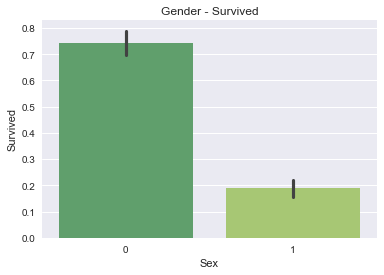

In [10]:
sns.barplot(x="Sex", y="Survived", data=Data, palette='summer')
plt.title("Gender - Survived")
plt.show()

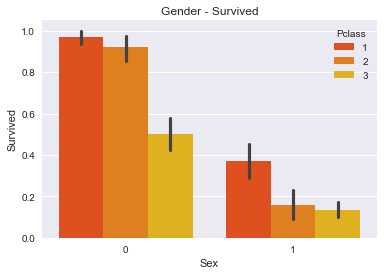

In [11]:
# Another kind of visualization

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=Data, palette="autumn")
plt.title("Gender - Survived")
plt.show()

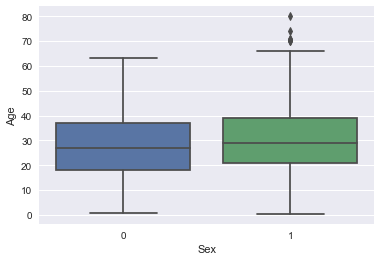

In [12]:
# And another one (Ящик с усами)

sns.boxplot(x="Sex", y="Age", data=Data)
plt.show()

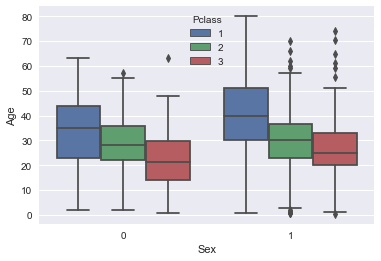

In [13]:
# The last one for Gender column

sns.boxplot(x="Sex", y="Age", hue="Pclass", data=Data)
plt.show()

## Handle of "Embarked" feature

In [14]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


(891, 11)

In [15]:
# Let's delete data with missed feature Embarked

Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(889, 11)

In [16]:
# Let's code Embarked with OneHot-codification
# (to avoid of great increasing of number of columns - 2 instead of 3
# we can code Q and S ports as 1 and 0 and drop port C,
# because if port not Q and not S then it is port C, so we aren't
# need C value for this feature)

Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1


## Handle of "Age" feature

In [17]:
# Check column for missed values

Data['Age'].isna().any()

True

In [18]:
# Fill the missed values by median values

median_age = Data["Age"].median()

Data['Age'].fillna(median_age, inplace=True)

<ipython-input-19-d3717a88c300>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Age'], kde=True)


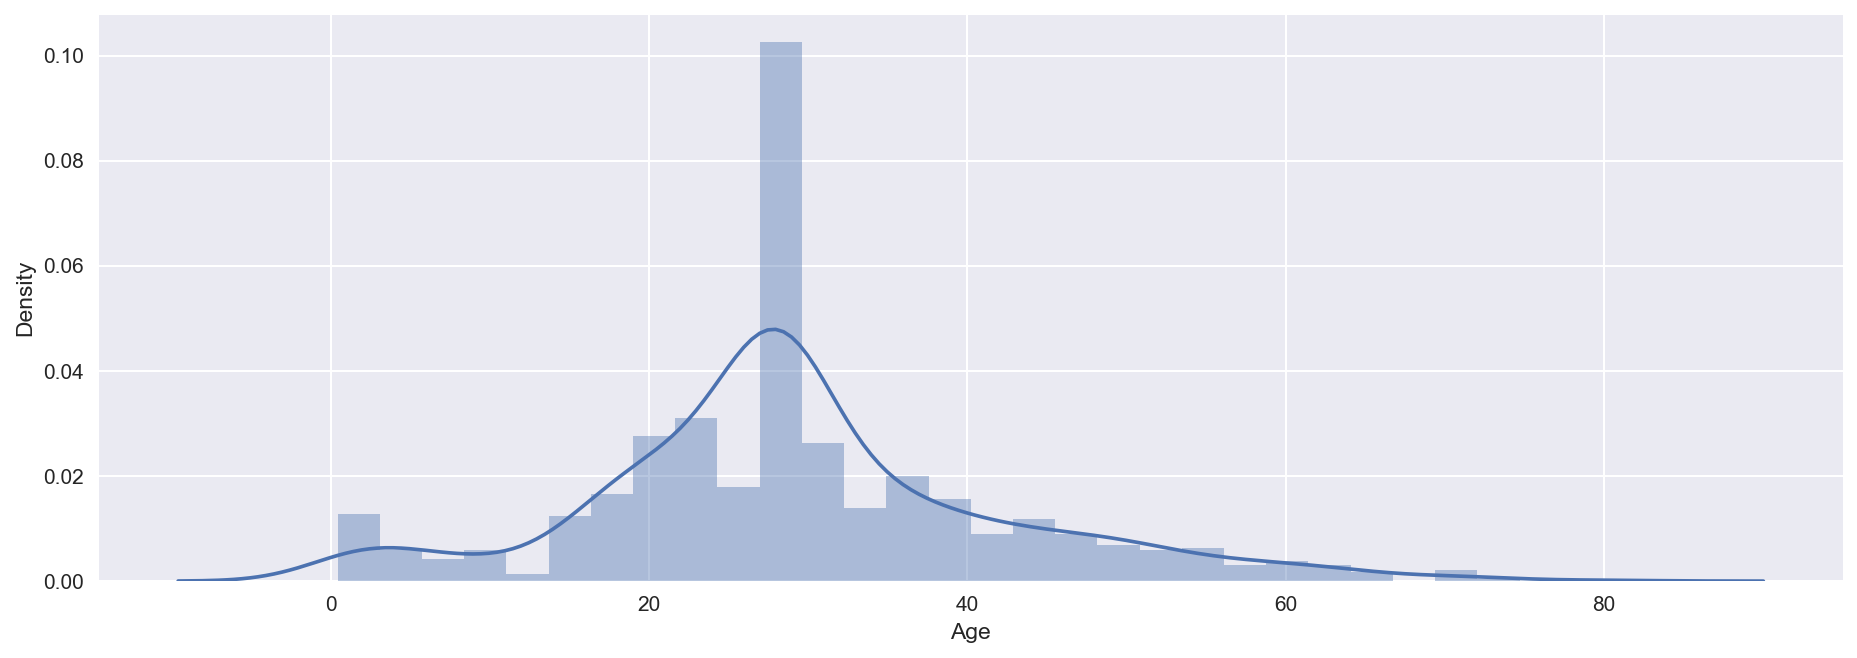

In [19]:
# Distribution of feature with these "restored" by median age missed values

plt.figure(figsize=(15, 5), dpi=150)
sns.distplot(Data['Age'], kde=True)
plt.plot();

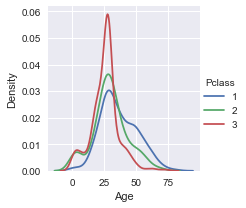

In [20]:
# Distribution depends of Pclass feature

facet = sns.FacetGrid(data=Data, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

## Handle of "Fare" feature

In [21]:
# Check column for missed values

Data['Fare'].isna().any()

False

In [22]:
Data[Data['Fare'] == 0]

# These data is not empty and such values aren't correct 
# because free tickets aren't seems like true

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
179,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,0,1
263,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.0,B94,0,1
271,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,0,1
277,0,2,"Parkes, Mr. Francis ""Frank""",1,28.0,0,0,239853,0.0,NaN,0,1
302,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,0,1
413,0,2,"Cunningham, Mr. Alfred Fleming",1,28.0,0,0,239853,0.0,NaN,0,1
466,0,2,"Campbell, Mr. William",1,28.0,0,0,239853,0.0,NaN,0,1
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,28.0,0,0,239854,0.0,NaN,0,1
597,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,0,1
633,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0.0,NaN,0,1


In [24]:
# Fill the incorrect values by median values

fare_median = Data["Fare"].median()

def fill_fare(fare):
    if fare == 0:
        return fare_median
    return fare

Data["Fare"] = Data['Fare'].apply(fill_fare)

In [28]:
len(Data[Data['Fare'] == 0])

0

## Handle of "Pclass" feature

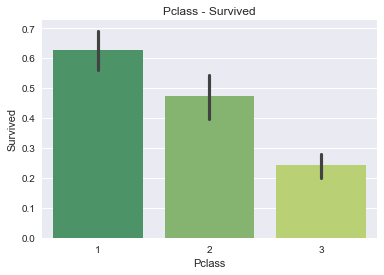

In [30]:
sns.barplot(x="Pclass", y="Survived", data=Data, palette='summer')
plt.title("Pclass - Survived")
plt.show()

## Handle of "SibSp" (number of brothers, sisters, wives, husbands) feature

In [31]:
Data["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Handle of "Parch" (number of parents/children) feature

In [32]:
Data["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Exploring of features and feature engineering

## Exploring of features

In [35]:
# Collect numeric data

NumericData = Data[["Survived", "Pclass", "Sex", 
                   "Age", "SibSp", "Parch", "Fare", 
                   "Embarked_Q", "Embarked_S"]]

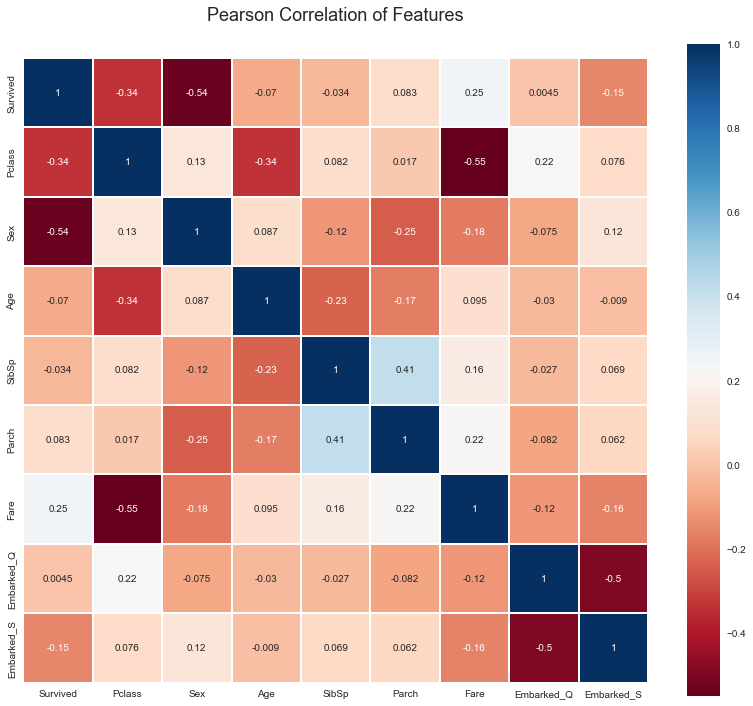

In [37]:
# Build Pearson correlation of features

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))

plt.title("Pearson Correlation of Features", y=1.05, size=18)
sns.heatmap(NumericData.corr(),
           linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True);

C:\Users\akalyuzhin\MLvenv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\akalyuzhin\MLvenv\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\akalyuzhin\MLvenv\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\akalyuzhin\MLvenv\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\akalyuzhin\MLvenv\li

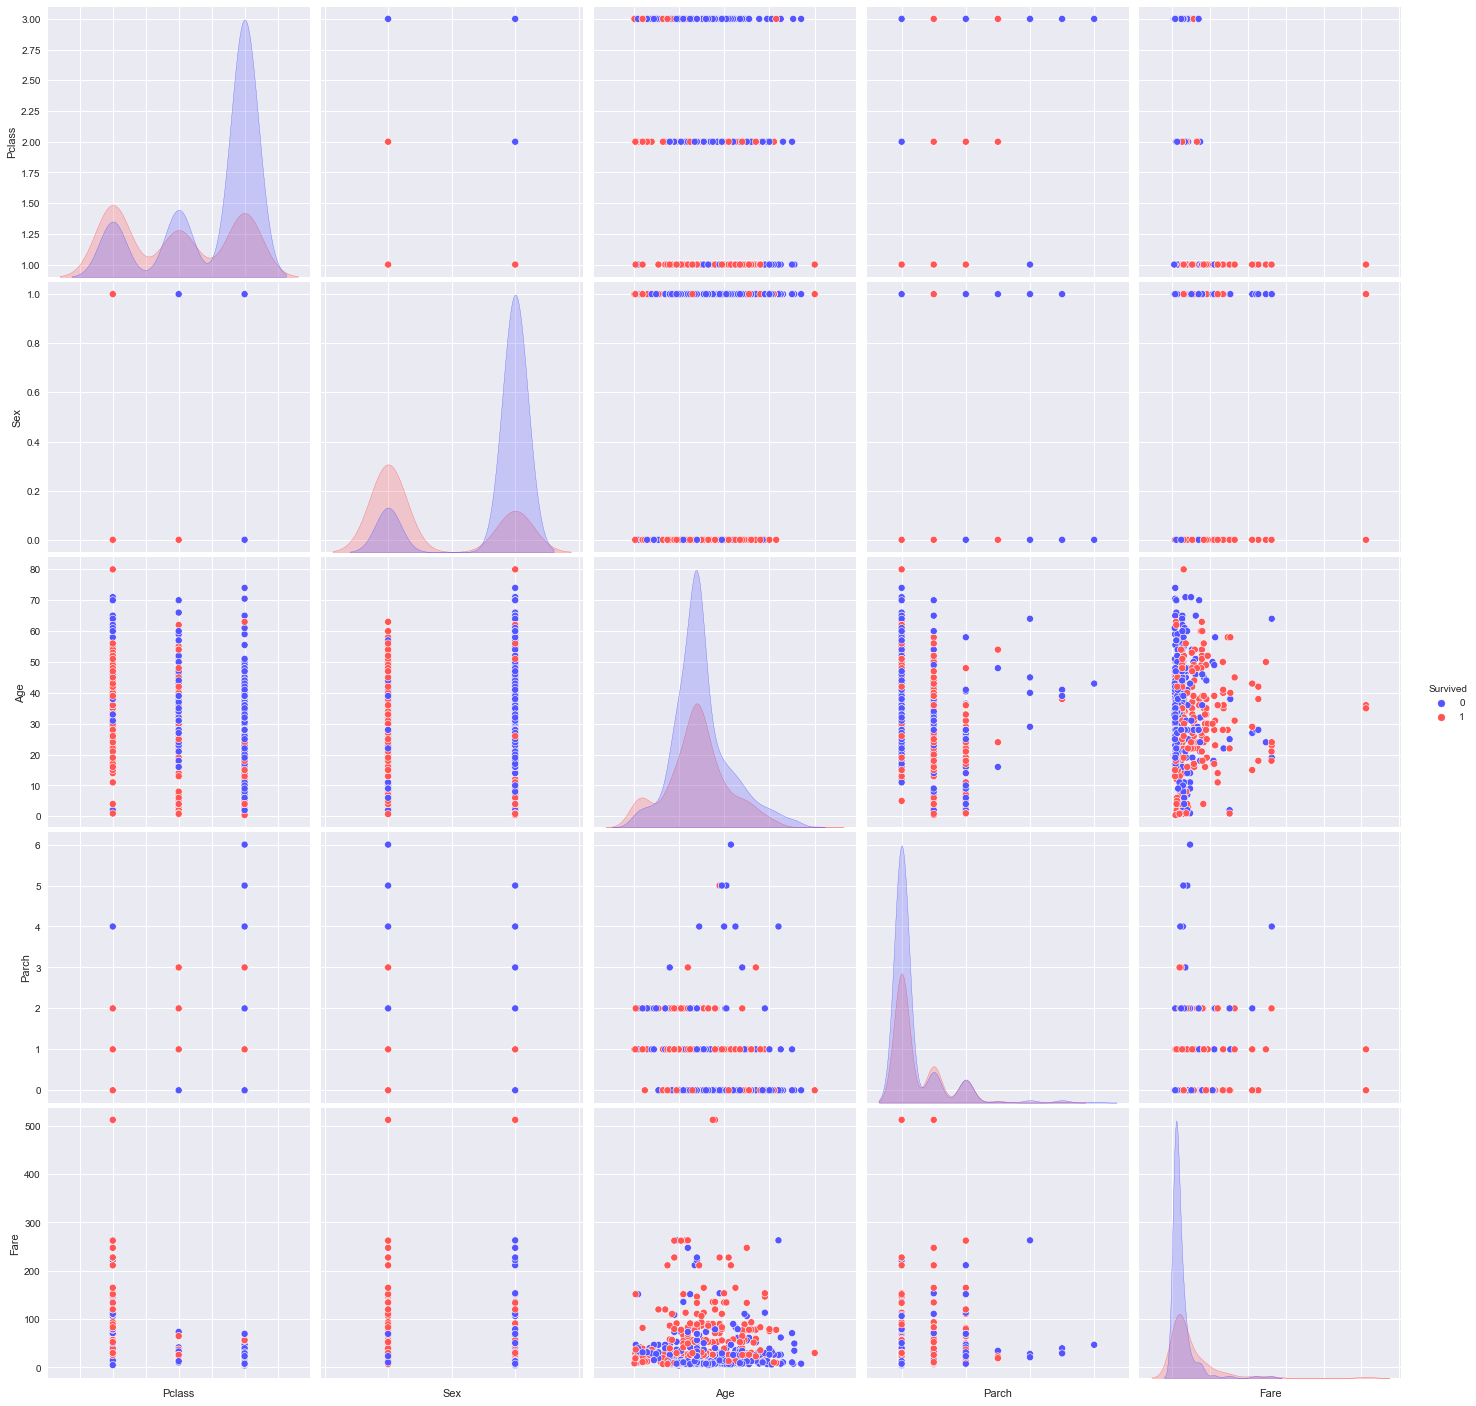

In [44]:
# Check pair dependences of some features

g = sns.pairplot(Data[[u"Survived", u"Pclass", u"Sex", u"Age", u"Parch", u"Fare"]], hue="Survived", \
                palette='seismic', size=4, diag_kind='kde', \
                diag_kws=dict(shade=True), plot_kws=dict(s=50))
g.set(xticklabels=[]);

## Features engineering

Sometimes a feature may be noised or include extra (provide overfitting) information. One of solutions is binarization of the feature (dividing feature into intervals and encoding the values by belonging to one of the intervals).

In `pandas` there are the following methods for binarization:
* `pd.cut` - dividing of integer data into several intervals by quantiles
* `pd.qcut` - dividing of numeric (not necessary integer) data into several intervals by quantiles

In [45]:
# Let's binarize Age feature for example

Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)
Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [50]:
# And now transform obtained intervals into integer numbers
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Encode'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin', 'AgeBin_Encode']].head()

,Age,AgeBin,AgeBin_Encode
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


But we can binarize features by ourselves with our own rules, not based on only quantiles.

Features engineering may be applied to features with not so great correlance with required feature (for instance, Parch not so great correlate with Survived). In this case we can construct new features based on these features, but with more correlation influence.